# Visualization with Pandas. 
### This is taken from the Pandas Documentation

In [13]:
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

## Basic Plotting: plot

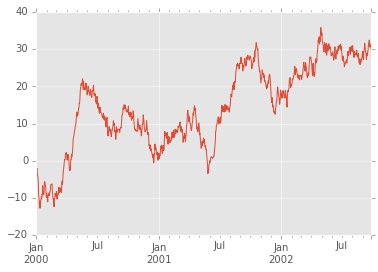

In [15]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000',periods=1000))
ts = ts.cumsum()
ts.plot()

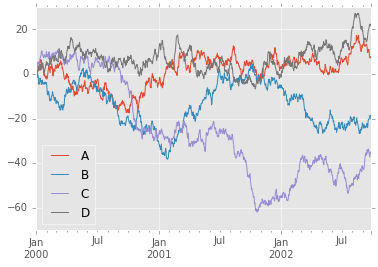

In [18]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure(figsize=(10,6)); df.plot();

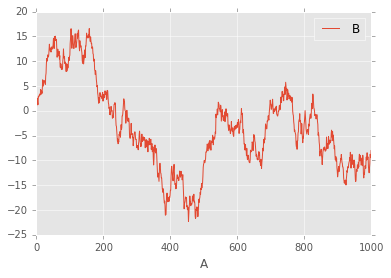

In [21]:
# Plot one column versus another
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=list('BC')).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3.plot(x='A', y='B')

## Bar Plots

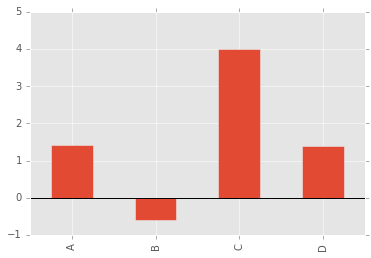

In [33]:
plt.figure();
df.ix[5].plot.bar(); plt.axhline(0, color='k')

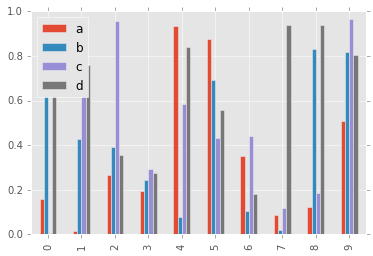

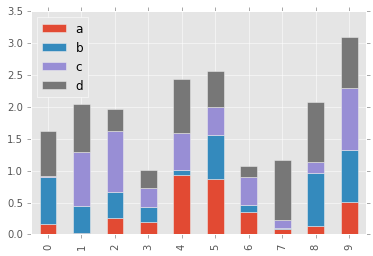

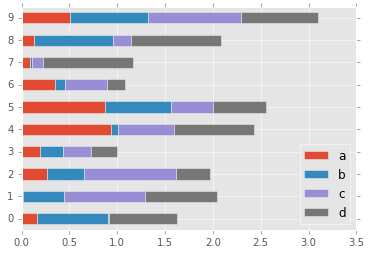

In [36]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar()
# Now create a stacked barplot
df2.plot.bar(stacked=True)

# Now an horizontal bar plot
df2.plot.barh(stacked=True)

## Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119fdf8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d124c50>]], dtype=object)

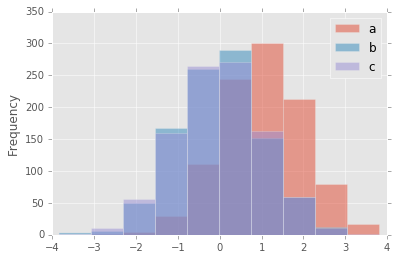

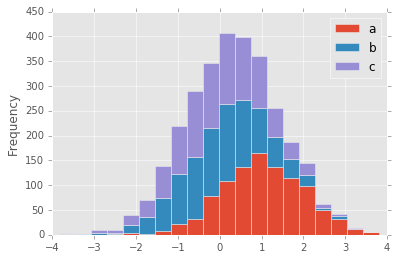

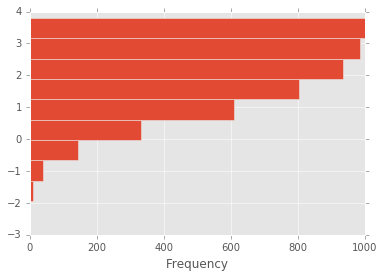

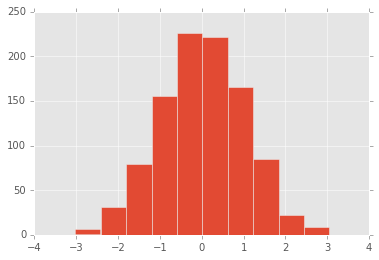

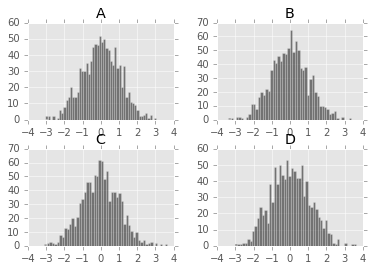

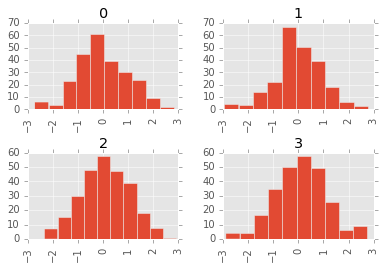

In [49]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b':np.random.randn(1000),
                   'c': np.random.randn(1000)}, columns=['a', 'b', 'c'])
plt.figure()
df4.plot.hist(alpha=0.5)

plt.figure()
df4.plot.hist(stacked=True, bins=20)

# Now draw an horizontal, cumulative histogram
plt.figure()
df4['a'].plot.hist(orientation='horizontal', cumulative=True)

plt.figure()
df['A'].diff().hist()

# PLot all columns
plt.figure()
df.diff().hist(color='k', alpha=0.5, bins=50)

# Use by to plot grouped histograms
data = pd.Series(np.random.randn(1000))
plt.figure()
data.hist(by=np.random.randint(0, 4, 1000), figsize=(6, 4))

## Box Plots

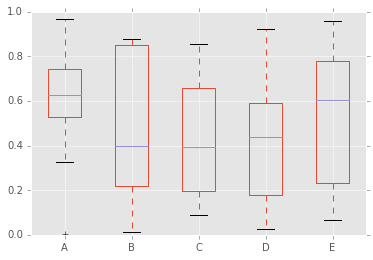

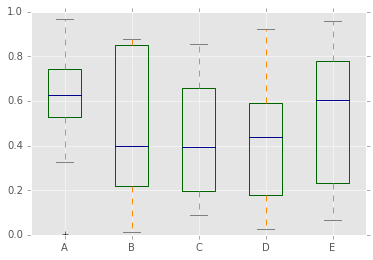

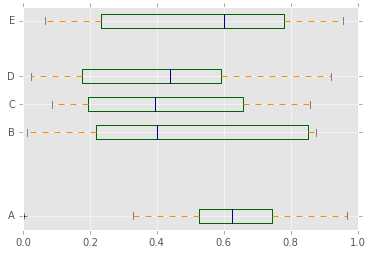

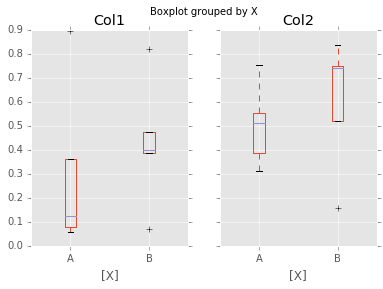

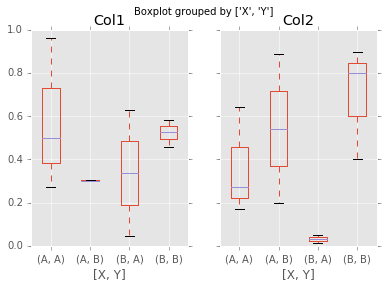

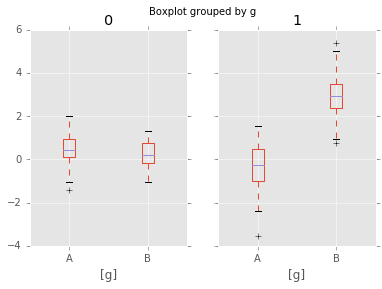

In [58]:
df = pd.DataFrame(np.random.rand(10,5), columns=['A', 'B', 'C', 'D', 'E'])
plt.figure()
df.plot.box()

plt.figure()
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
df.plot.box(color=color, sym='r+')

plt.figure()
df.plot.box(vert=False, positions=[1, 4, 5, 6, 8], color=color)

# Stratified boxplot using the by argument
df = pd.DataFrame(np.random.rand(10, 2), columns=['Col1', 'Col2'])
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
plt.figure()
bp = df.boxplot(by='X')

df = pd.DataFrame(np.random.rand(10, 3), columns=['Col1', 'Col2', 'Col3'])
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
df['Y'] = pd.Series(['A','B','A','B','A','B','A','B','A','B'])
plt.figure()
bp = df.boxplot(column=['Col1','Col2'], by=['X', 'Y'])

np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50, 2))
df_box['g'] = np.random.choice(['A', 'B'], size=50)
df_box.loc[df_box['g'] == 'B', 1] += 3
bp = df_box.boxplot(by='g')

## Area Plot

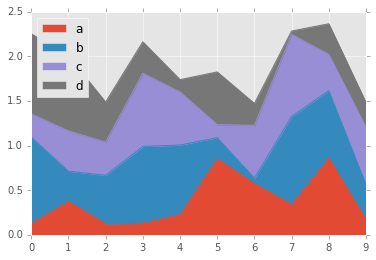

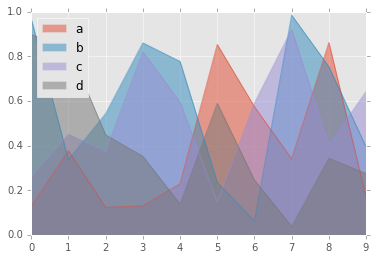

In [61]:
# Remember that dropna or fillna must be called before plotting
np.random.seed(123456)
plt.figure()
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area()

plt.figure()
df.plot.area(stacked=False)

## Scatter Plot

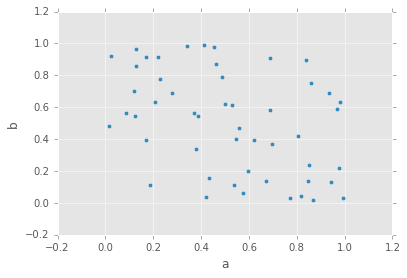

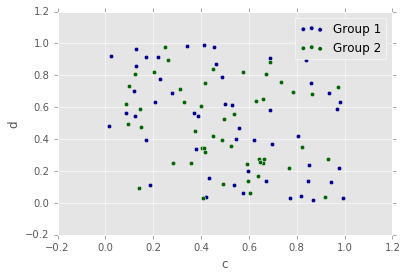

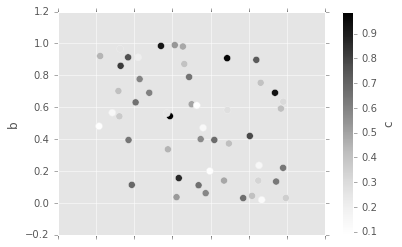

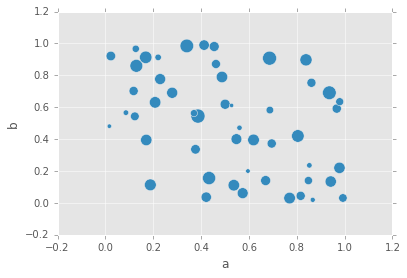

In [65]:
np.random.seed(123456)
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b')

plt.figure()
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1')
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax)

# Use a column for color
plt.figure()
df.plot.scatter(x='a', y='b', c='c', s=50)

# Use a column for bubble size
plt.figure()
df.plot.scatter(x='a', y='b', s=df['c']*200)

## Hexagonal Bin Plot

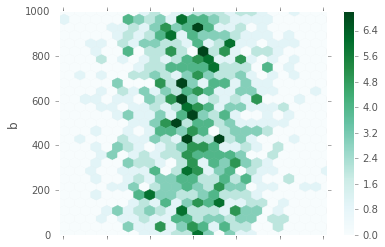

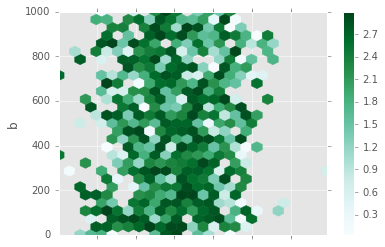

In [71]:
plt.figure(figsize=(10,6))
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)
df.plot.hexbin(x='a', y='b', gridsize=25)

# Using c and reduce_c function in order to compute the value of the bin around each (x,y) pair
plt.figure()
df = pd.DataFrame(np.random.randn(1000,2), columns=['a', 'b'])
df['b'] = df['b'] = df['b'] + np.arange(1000)
df['z'] = np.random.uniform(0, 3, 1000)
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max, gridsize=25)

## Pie Plot

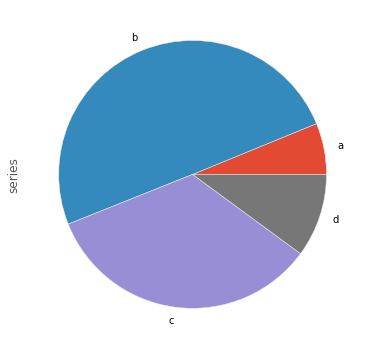

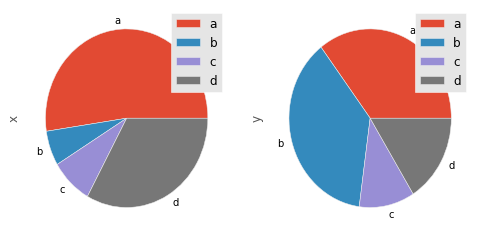

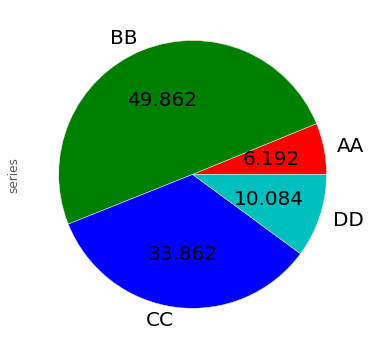

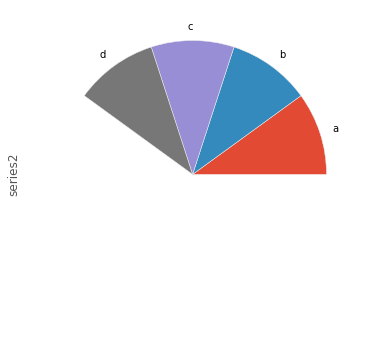

In [83]:
series = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
plt.figure()
series.plot.pie(figsize=(6,6))

# Pie Plot on DataFrame
plt.figure()
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])
df.plot.pie(subplots=True, figsize=(8,4))

# Use some other keywords from pyplot
plt.figure()
series.plot.pie(labels=['AA', 'BB', 'CC', 'DD'], colors=['r', 'g', 'b', 'c'], 
                autopct='%.3f', fontsize=20, figsize=(6,6))

# Values with sum less than 1
plt.figure()
series = pd.Series([0.1] * 4, index=['a','b','c','d'], name='series2')
series.plot.pie(figsize=(6,6))

# Plotting Tools

Can be imported from pandas.tools.plotting and take Series or Dataframes as an argument

## Scatter Matrix Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120b9de10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11de88748>]], dtype=object)

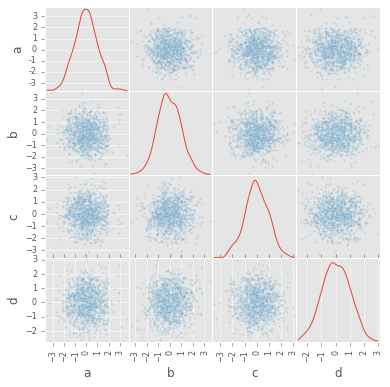

In [85]:
from pandas.tools.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a','b','c','d'])
plt.figure()
scatter_matrix(df, alpha=0.2, figsize=(6,6), diagonal='kde')

## Density Plot

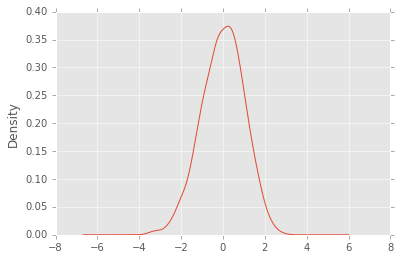

In [86]:
ser = pd.Series(np.random.randn(1000))
ser.plot.kde()

## Andrews Curves

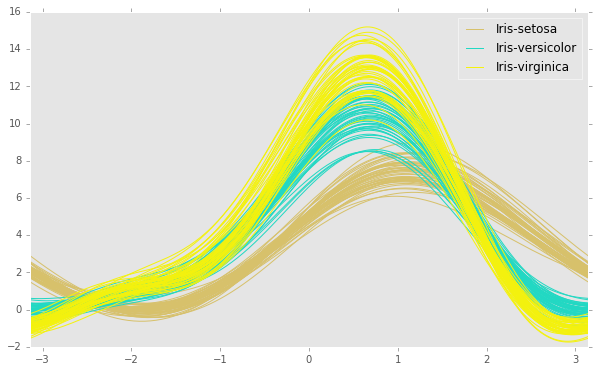

In [92]:
from pandas.tools.plotting import andrews_curves
data = pd.read_csv('data/iris.csv')
plt.figure(figsize=(10,6))
andrews_curves(data, 'Name')

## Parallel Coordinates

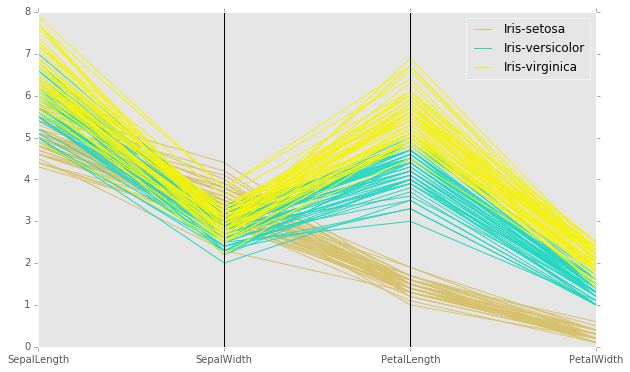

In [95]:
from pandas.tools.plotting import parallel_coordinates
data = pd.read_csv('data/iris.csv')
plt.figure(figsize=(10, 6))
parallel_coordinates(data, 'Name')

## Lag Plot

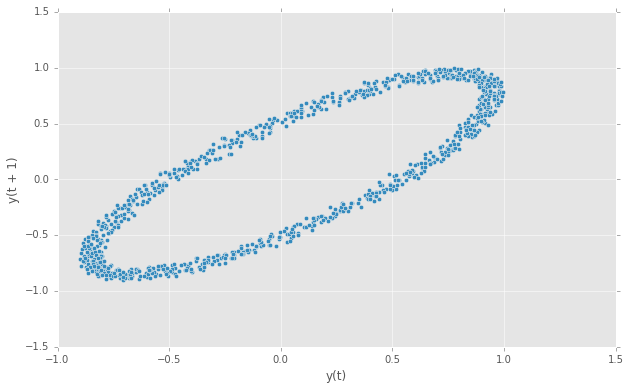

In [96]:
from pandas.tools.plotting import lag_plot
plt.figure(figsize=(10,6))
data = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(np.linspace(-99*np.pi, 99 * np.pi, num=1000)))
lag_plot(data)

## Autocorrelation Plot

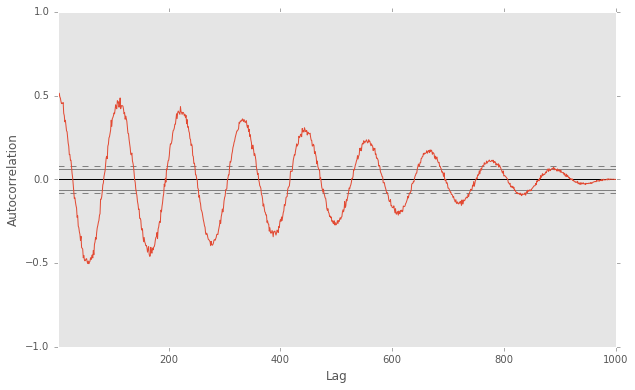

In [98]:
from pandas.tools.plotting import autocorrelation_plot
plt.figure(figsize=(10,6))
data = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(np.linspace(-9*np.pi, 9 * np.pi, num=1000)))
autocorrelation_plot(data)

## Bootstrap Plot

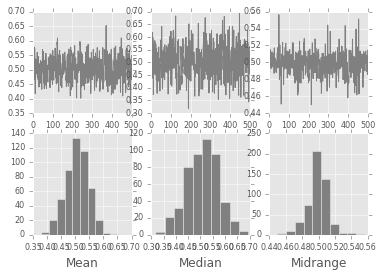

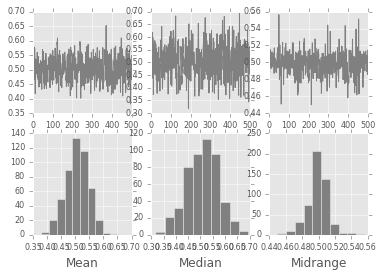

In [107]:
from pandas.tools.plotting import bootstrap_plot
plt.figure()
data = pd.Series(np.random.rand(1000))
bootstrap_plot(data, size=50, samples=500, color='grey')

## RadViz

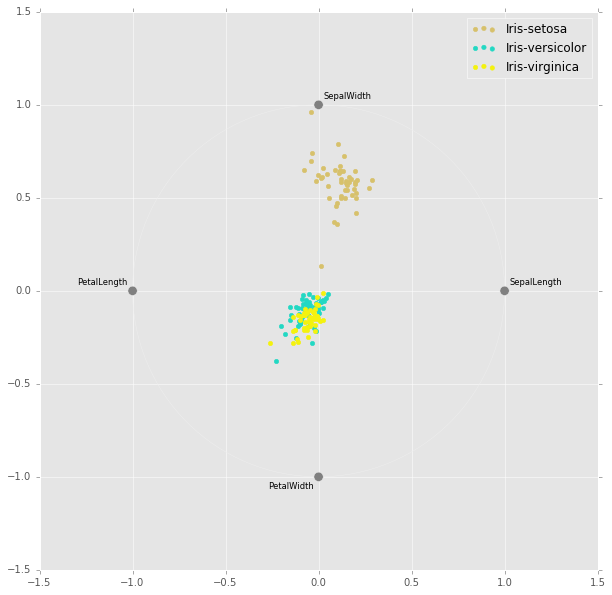

In [111]:
from pandas.tools.plotting import radviz
data = pd.read_csv('data/iris.csv')
plt.figure(figsize=(10,10))
radviz(data, 'Name')

# Plot Formatting

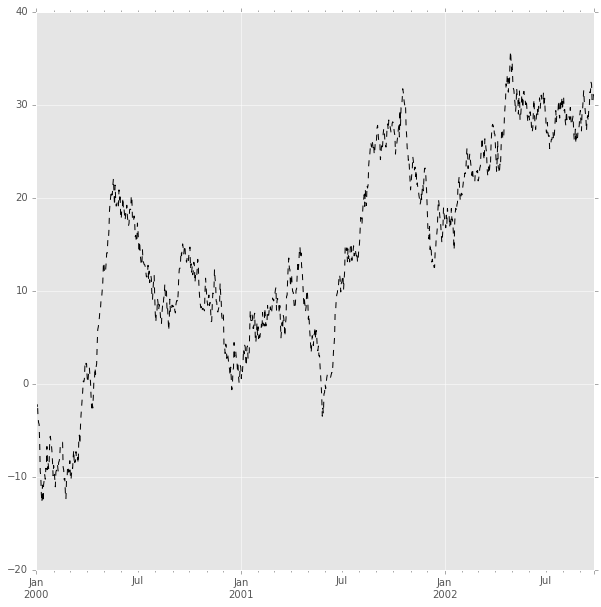

In [113]:
plt.figure(figsize=(10,10)); ts.plot(style='k--', label='Series')

## Controlling the Legend

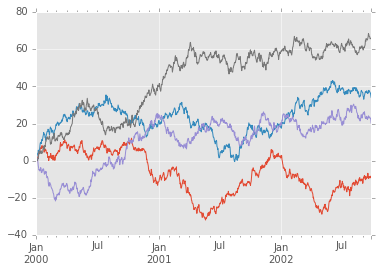

In [117]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot(legend=False)

## Scales

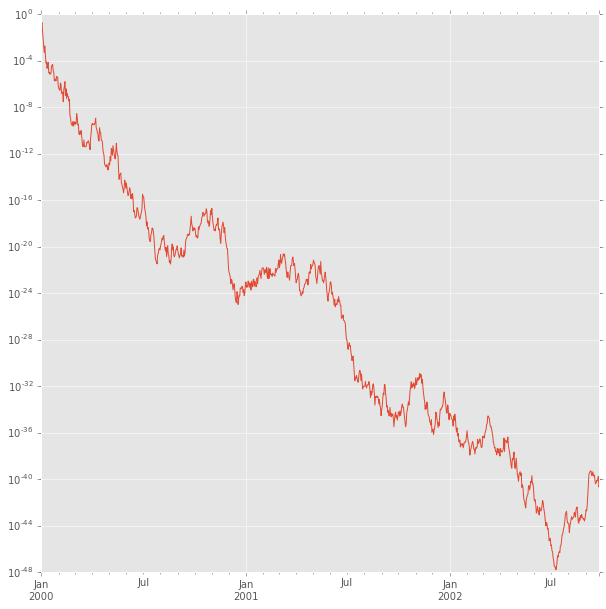

In [121]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = np.exp(ts.cumsum())
plt.figure(figsize=(10, 10))
ts.plot(logy=True)

## Plotting on a secondary Y-axis

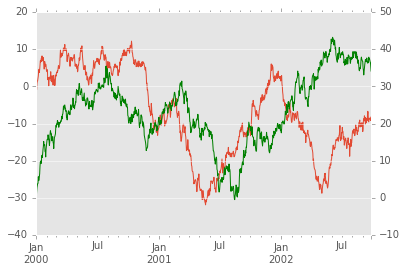

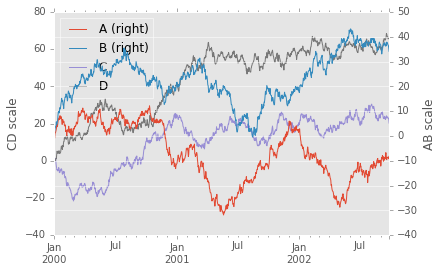

In [125]:
df.A.plot()
df.B.plot(secondary_y=True, style='g')

# To plot some columns in a Dataframe, give the column names to the secondary_y keyword
plt.figure(figsize=(10,10))
ax = df.plot(secondary_y=['A', 'B'])
ax.set_ylabel('CD scale')
ax.right_ax.set_ylabel('AB scale')

## Subplots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12b8e5278>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x129c5f898>], dtype=object)

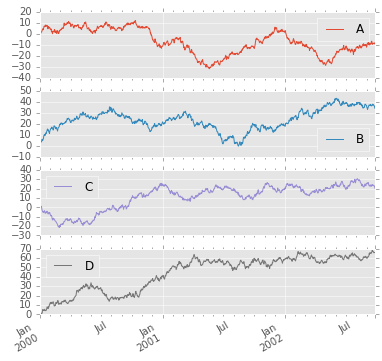

In [126]:
df.plot(subplots=True, figsize=(6, 6))

## Using Layout and Targeting Multiple Axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129c39160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x129104dd8>]], dtype=object)

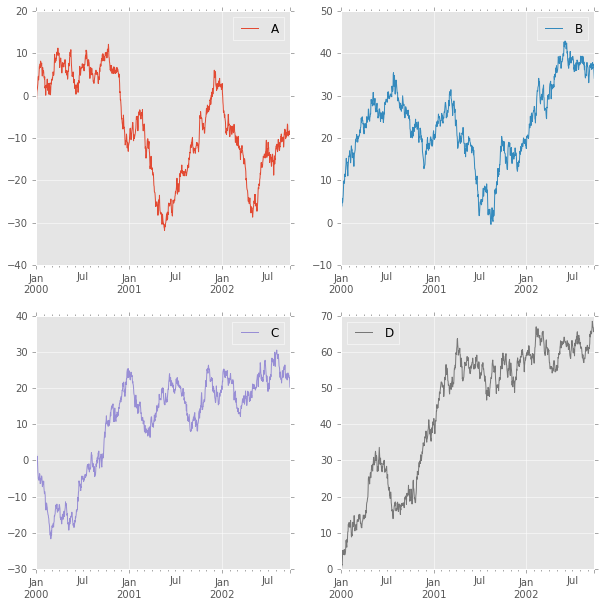

In [127]:
df.plot(subplots=True, layout=(2, -1), figsize=(10,10), sharex=False)